In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import category_encoders as ce
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import make_pipeline
from sklearn.inspection import plot_partial_dependence

# Loading Insurance Premiums Data

In [48]:
df = pd.read_csv(r'C:\Users\samina\Desktop\GA_DATA_SCIENCE\Data_Sci\Homework\Unit3\data\insurance_premiums.csv')
#df.head(5)

# Encoders

In [142]:
te = ce.TargetEncoder(cols=['smoker'], min_samples_leaf=30, smoothing = 4.0)                        #Not working
ohe = ce.OneHotEncoder(cols=['region', 'sex'], verbose=1)     #Not working

#____________________________________________________
#label encoder transform sex, smoker, region columns
#le = LabelEncoder()       #label encoder
#df['sex'] = le.fit_transform(df['sex'])
#df['smoker'] = le.fit_transform(df['smoker'])
#df['region'] = le.fit_transform(df['region'])
#___________________________________________________

#gadient Boosting - Working params gathered from GBM tweaking file
gbm = GradientBoostingRegressor(learning_rate=0.2, n_estimators=610, criterion='mse', max_depth=3,loss='ls',verbose=1)
#pipe = make_pipeline(le, gbm)
pipe = make_pipeline(te, ohe, gbm)
#pipe = make_pipeline(te, ohe, gbm)            #pipe 2 uses Gradient boosting
#print(ohe)
#print(te)
print(pipe)

#print(le)

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['smoker'], min_samples_leaf=30,
                               smoothing=4.0)),
                ('onehotencoder',
                 OneHotEncoder(cols=['region', 'sex'], verbose=1)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(criterion='mse', learning_rate=0.2,
                                           n_estimators=610, verbose=1))])


# Splitting Test, Train n Validation dataset

In [143]:
def split_dataset(df, split_frac=0.2, return_val = True, return_test = False, random_state = 7):
    X = df.drop('charges', axis=1)
    y = df['charges']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_frac, random_state = random_state)
        
    if return_val:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = split_frac, random_state = random_state)

    if return_val and return_test:
        return X_train, y_train, X_val, y_val, X_test, y_test
    
    if return_val:
        return X_train, y_train, X_val, y_val

In [144]:
#train, val, test = create_val_splits(df, return_val=True)
X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(df, split_frac=0.15, return_val=True, return_test=True)

In [150]:
X_train = pipe[0].fit_transform(X_train, y_train)
X_train = pipe[1].fit_transform(X_train, y_train)
pipe[2].fit(X_train, y_train)

F:\ANACONDA\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
F:\ANACONDA\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


      Iter       Train Loss   Remaining Time 
         1   102256642.1871            0.61s
         2    72931377.1199            0.61s
         3    54055736.3726            0.81s
         4    41838212.1640            0.76s
         5    33892658.5239            0.73s
         6    28731502.4608            0.70s
         7    25303075.7351            0.69s
         8    23021394.4124            0.68s
         9    21481144.3399            0.67s
        10    20437692.6031            0.66s
        20    17178486.1657            0.59s
        30    15728312.5920            0.56s
        40    14363132.8994            0.53s
        50    13255384.6020            0.51s
        60    12326695.8071            0.55s
        70    11677359.0208            0.53s
        80    11055474.3202            0.51s
        90     9940971.0122            0.50s
       100     9370268.0711            0.48s
       200     6280329.3670            0.38s
       300     4208598.3116            0.28s
       40

GradientBoostingRegressor(criterion='mse', learning_rate=0.2, n_estimators=610,
                          verbose=1)

#  Partial dependence for a single column w/ ice lines

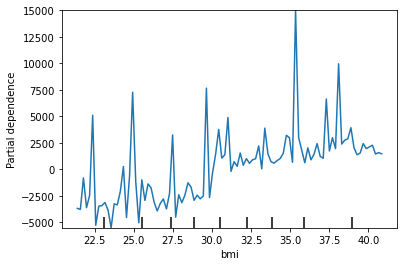

In [164]:
plot_partial_dependence(pipe[2], X_train, ['bmi'], kind='average')

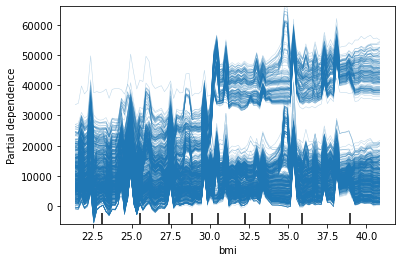

In [154]:
plot_partial_dependence(pipe[2], X_train, ['bmi'], kind='individual')

# Interactions -- between BMI and smoking

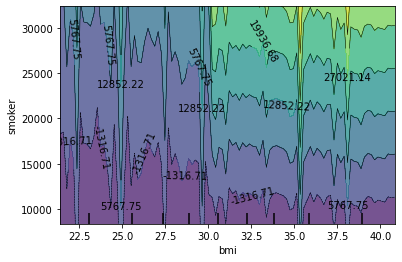

In [159]:
plot_partial_dependence(pipe[2], X_train, [('bmi', 'smoker')]);

In [145]:
pipe.fit(X_train, y_train)    #<-- pipe.fit(X_train, y_train)

F:\ANACONDA\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
F:\ANACONDA\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


      Iter       Train Loss   Remaining Time 
         1   102256642.1871            0.61s
         2    72931377.1199            0.61s
         3    54055736.3726            0.61s
         4    41838212.1640            0.61s
         5    33892658.5239            0.73s
         6    28731502.4608            0.70s
         7    25303075.7351            0.69s
         8    23021394.4124            0.60s
         9    21481144.3399            0.60s
        10    20437692.6031            0.66s
        20    17178486.1657            0.56s
        30    15728312.5920            0.54s
        40    14363132.8994            0.53s
        50    13255384.6020            0.50s
        60    12326695.8071            0.49s
        70    11677359.0208            0.49s
        80    11055474.3202            0.48s
        90     9940971.0122            0.46s
       100     9370268.0711            0.45s
       200     6280329.3670            0.35s
       300     4208598.3116            0.27s
       40

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['smoker'], min_samples_leaf=30,
                               smoothing=4.0)),
                ('onehotencoder',
                 OneHotEncoder(cols=['region', 'sex'], verbose=1)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(criterion='mse', learning_rate=0.2,
                                           n_estimators=610, verbose=1))])

In [146]:
pipe.predict(X_val)    #<-- pipe.predict

array([ 1.74478380e+03,  9.96730837e+03,  1.01592351e+04,  1.71894272e+04,
        1.59808265e+04,  2.93847649e+03,  1.33797361e+04,  1.00237250e+04,
        1.03162939e+04,  8.30645287e+03,  8.33879240e+03,  9.14753603e+03,
        6.74008680e+03,  3.16844425e+04,  2.18835450e+04,  1.87494412e+04,
        4.82665246e+03,  4.18369169e+04,  3.48502925e+04,  7.87800487e+03,
        3.58524712e+04,  1.21151476e+04,  1.28087796e+04,  7.10949705e+03,
        1.45910866e+04,  3.87075082e+04,  8.28349756e+03,  1.15241107e+04,
        6.90056806e+03,  8.04315725e+03,  6.19259218e+03,  8.14146351e+03,
        2.30038371e+04,  1.85213675e+04,  1.37699912e+03,  1.24414302e+04,
       -1.51050403e+03,  1.14313960e+04,  3.80163478e+04,  7.05346864e+03,
        3.73437240e+03,  2.78813452e+04,  1.13870687e+04,  6.59525962e+03,
        4.60504499e+04,  1.70633728e+04,  7.32256751e+03,  5.12124360e+04,
        3.55661377e+03,  3.22623247e+03,  1.20284414e+04,  1.01873661e+04,
        4.05158847e+04,  

## BaseLine score

In [147]:
pipe.score(X_val, y_val)      #<-- pipe.score

0.8007515310534719

## GBM model already robust from the gbm_tweaking_params file
### values gathered from gbm_tweaking_params file
# Combining training and validation datasets

In [139]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [148]:
pipe.fit(X_train, y_train)

F:\ANACONDA\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
F:\ANACONDA\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


      Iter       Train Loss   Remaining Time 
         1   102256642.1871            0.61s
         2    72931377.1199            0.61s
         3    54055736.3726            0.61s
         4    41838212.1640            0.61s
         5    33892658.5239            0.60s
         6    28731502.4608            0.60s
         7    25303075.7351            0.60s
         8    23021394.4124            0.60s
         9    21481144.3399            0.60s
        10    20437692.6031            0.60s
        20    17178486.1657            0.56s
        30    15728312.5920            0.54s
        40    14363132.8994            0.51s
        50    13255384.6020            0.50s
        60    12326695.8071            0.49s
        70    11677359.0208            0.48s
        80    11055474.3202            0.47s
        90     9940971.0122            0.46s
       100     9370268.0711            0.45s
       200     6280329.3670            0.37s
       300     4208598.3116            0.28s
       40

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['smoker'], min_samples_leaf=30,
                               smoothing=4.0)),
                ('onehotencoder',
                 OneHotEncoder(cols=['region', 'sex'], verbose=1)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(criterion='mse', learning_rate=0.2,
                                           n_estimators=610, verbose=1))])

In [149]:
pipe1.score(X_test, y_test)

0.7944815929742558